# Outlier detection and removal using IQR

- IQR is another technique that one can use to detect and remove outliers.
- The formula for IQR is: IQR = Q3-Q1
- where Q3 is 75th percentile and Q1 is 25th percentile.

lower_limit = Q1-1.5*IQR

upper_limit = Q3 +1.5*IQR

In [1]:
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
df=pd.read_csv('heights_1.csv')
df.head()

,gender,height
0,Male,73.847017
1,Male,68.781904
2,Male,74.110105
3,Male,71.730978
4,Male,69.881796


In [3]:
df.describe()

,height
count,10000.000000
mean,66.367560
std,3.847528
min,54.263133
25%,63.505620
50%,66.318070
75%,69.174262
max,78.998742


In [4]:
df.shape

(10000, 2)

In [5]:
Q1 = df.height.quantile(0.25)
Q3 = df.height.quantile(0.75)
Q1, Q3

(63.505620480000005, 69.17426172750001)

In [6]:
IQR = Q3 - Q1
IQR

5.668641247500005

In [7]:
lower_limit = Q1 - 1.5*IQR
upper_limit = Q3 + 1.5*IQR
lower_limit, upper_limit

(55.00265860875, 77.67722359875002)

In [8]:
df[(df.height<lower_limit) | (df.height>upper_limit)]

,gender,height
994,Male,78.095867
1317,Male,78.462053
2014,Male,78.998742
3285,Male,78.528210
3757,Male,78.621374
6624,Female,54.616858
7294,Female,54.873728
9285,Female,54.263133


In [9]:
no_outliers = df[(df.height>lower_limit) & (df.height<upper_limit)]
no_outliers.shape

(9992, 2)

In [10]:
df.shape[0] - no_outliers.shape[0]

8

### Task:-

(1) Load the given csv in pandas dataframe and first plot histograms for height and weight parameters

(2) Using IQR detect weight outliers and print them

(3) Using IQR, detect height outliers and print them

In [11]:
df2 = pd.read_csv('weight-height.csv')
df2.head()

,Gender,Height,Weight
0,Male,73.847017,241.893563
1,Male,68.781904,162.310473
2,Male,74.110105,212.740856
3,Male,71.730978,220.042470
4,Male,69.881796,206.349801


In [12]:
df2.describe()

,Height,Weight
count,10000.000000,10000.000000
mean,66.367560,161.440357
std,3.847528,32.108439
min,54.263133,64.700127
25%,63.505620,135.818051
50%,66.318070,161.212928
75%,69.174262,187.169525
max,78.998742,269.989699


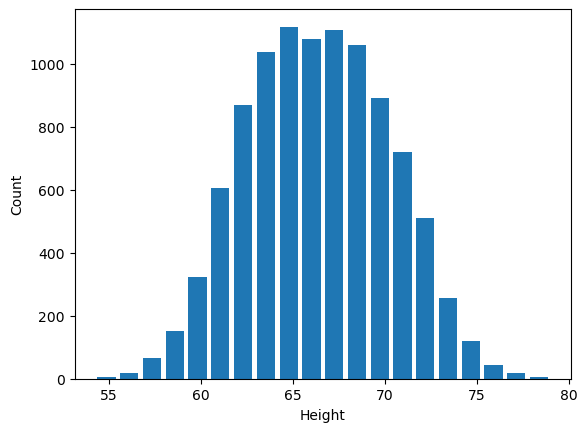

In [13]:
# Histogram Plot for Height
plt.hist(df2.Height, bins=20, rwidth=0.8)
plt.xlabel('Height')
plt.ylabel('Count')
plt.show()

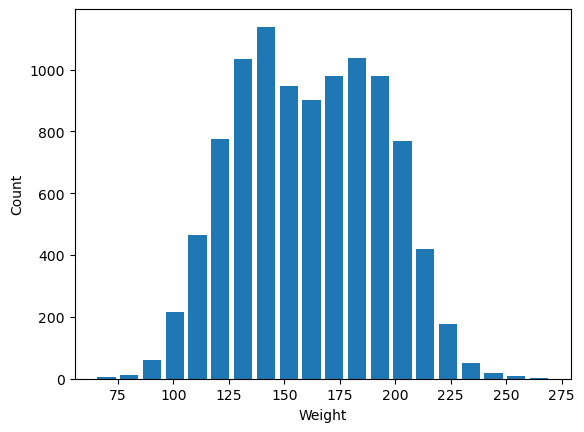

In [14]:
# Histogram Plot for Weight
plt.hist(df2.Weight, bins=20, rwidth=0.8)
plt.xlabel('Weight')
plt.ylabel('Count')
plt.show()

#### Detecting Outliers for Height

In [15]:
quan1 = df2.Height.quantile(0.25)
quan3 = df2.Height.quantile(0.75)
quan1, quan3

(63.505620481218955, 69.1742617268347)

In [16]:
IQR_h = quan3 - quan1
IQR_h

5.668641245615746

In [17]:
lower_h = quan1 - 1.5*IQR_h
upper_h = quan3 + 1.5*IQR_h
lower_h, upper_h

(55.00265861279534, 77.67722359525831)

In [18]:
df2[(df2.Height < lower_h) | (df2.Height > upper_h)]

,Gender,Height,Weight
994,Male,78.095867,255.690835
1317,Male,78.462053,227.342565
2014,Male,78.998742,269.989699
3285,Male,78.528210,253.889004
3757,Male,78.621374,245.733783
6624,Female,54.616858,71.393749
7294,Female,54.873728,78.606670
9285,Female,54.263133,64.700127


#### Detecting Outliers for Weight

In [19]:
quantile1 = df2.Weight.quantile(0.25)
quantile3 = df2.Weight.quantile(0.75)
quantile1, quantile3

(135.8180513055015, 187.16952486868348)

In [20]:
IQR_w = quantile3 - quantile1
IQR_w

51.35147356318197

In [21]:
lower_w = quantile1 - 1.5*IQR_w
upper_w = quantile3 + 1.5*IQR_w
lower_w, upper_w

(58.79084096072856, 264.19673521345646)

In [22]:
df2[(df2.Weight < lower_w) | (df2.Weight > upper_w)]

,Gender,Height,Weight
2014,Male,78.998742,269.989699


### Now Removing the Outliers from the DataFrame

In [23]:
df2_no_outliers = df2[((df2.Height > lower_h) & (df2.Height < upper_h)) & ((df2.Weight > lower_w) & (df2.Weight < upper_w))]
df2_no_outliers.head()

,Gender,Height,Weight
0,Male,73.847017,241.893563
1,Male,68.781904,162.310473
2,Male,74.110105,212.740856
3,Male,71.730978,220.042470
4,Male,69.881796,206.349801


In [24]:
df2.shape

(10000, 3)

In [25]:
df2_no_outliers.shape

(9992, 3)

In [26]:
df2.shape[0] - df2_no_outliers.shape[0]

8